# NBA Player Shot Charts

## Introduction
This notebook analyzes NBA shot data and visualizes shot charts for individual players. 
We are using Python, pandas, nba_api, and matplotlib.


### Imports

In this section, we import the libraries needed for our analysis and visualization:

- `pandas`: For handling data frames.
- `nba_api`: Used to fetch player, team, and shot data from the NBA API.
- `matplotlib`: For visualizing data, particularly for plotting the shot chart and drawing basketball court elements.


In [1016]:
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Defining Team Colors

We define a dictionary that maps NBA teams to their primary colors.
These will be referenced later when generating our visualizations.

In [1017]:
team_colors = {
    "Atlanta Hawks": "#E03A3E",  # Red
    "Boston Celtics": "#007A33",  # Green
    "Brooklyn Nets": "#808080",  # Gray
    "Charlotte Hornets": "#1D1160",  # Purple
    "Chicago Bulls": "#CE1141",  # Red
    "Cleveland Cavaliers": "#860038",  # Wine
    "Dallas Mavericks": "#00538C",  # Blue
    "Denver Nuggets": "#FEC524",  # Sunshine Yellow
    "Detroit Pistons": "#C8102E",  # Red
    "Golden State Warriors": "#1D428A",  # Blue
    "Houston Rockets": "#CE1141",  # Red
    "Indiana Pacers": "#002D62",  # Navy
    "LA Clippers": "#C8102E",  # Red
    "Los Angeles Lakers": "#552583",  # Purple
    "Memphis Grizzlies": "#5D76A9",  # Blue
    "Miami Heat": "#98002E",  # Red
    "Milwaukee Bucks": "#00471B",  # Green
    "Minnesota Timberwolves": "#78BE20",  # Aurora Green
    "New Orleans Pelicans": "#85714D",  # Gold
    "New York Knicks": "#006BB6",  # Blue
    "Oklahoma City Thunder": "#007AC1",  # Blue
    "Orlando Magic": "#0077C0",  # Blue
    "Philadelphia 76ers": "#006BB6",  # Blue
    "Phoenix Suns": "#1D1160",  # Purple
    "Portland Trail Blazers": "#E03A3E",  # Red
    "Sacramento Kings": "#5A2D81",  # Purple
    "San Antonio Spurs": "#C4CED4",  # Silver
    "Toronto Raptors": "#CE1141",  # Red
    "Utah Jazz": "#002B5C",  # Navy
    "Washington Wizards": "#002B5C",  # Navy
}

### Searching for a Player by Name

In this cell, we search for a specific player using their full name, in this case, **Jalen Brunson** (the best pg in the league, no bias).

In [1068]:
# Search for the player by name
player_name = "Jalen Brunson"
player_info = players.find_players_by_full_name(player_name)
player_id = player_info[0]['id']

[{'id': 1628973, 'full_name': 'Jalen Brunson', 'first_name': 'Jalen', 'last_name': 'Brunson', 'is_active': True}]


### Fetching Player Shot Data for the 2023-2024 Season

We retrieve the player's shot data for the 2023-24 NBA season using the `ShotChartDetail` API endpoint. The data is filtered by season and regular season games, focusing on field goal attempts.

Key steps:
- The shot data is converted into a DataFrame (`shot_df`).
- The player's team ID is extracted from the DataFrame and mapped to the team's full name.
- The first few rows of the DataFrame and shot type counts are displayed to get an overview of the data.


In [1059]:
# Fetch shot data for the 2023-24 NBA season
shot_data = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    season_nullable='2023-24',
    season_type_all_star='Regular Season',
    context_measure_simple='FGA'
)

# Convert the shot data into a DataFrame
shot_df = shot_data.get_data_frames()[0]
shot_df.head()  # Show the first few rows

# Get the team name from the shot data
player_team_id = shot_df['TEAM_ID'][0]
team_name = [team for team in team_info if team['id'] == player_team_id][0]['full_name']

print(shot_df.columns)  # Show the data types of each column

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')


### Calculating Relevant Player Statistics

The next few cells are dedicated to calculating a player's statistics, including stats like their 3P%, 2P%, Clutch FG%.

In [1069]:
# Get relevant totals statistics
total_shots = shot_df.shape[0]
print(f"Total Shots: {total_shots}")

total_makes = shot_df[shot_df['SHOT_MADE_FLAG'] == 1].shape[0]
print(f"Total Makes: {total_makes}")

total_make_percentage = total_makes / total_shots
fg_percentage = str(round(total_make_percentage * 100, 1)) + '%'
print(f"Field Goal Percentage: {fg_percentage}")

Total Shots: 1648
Total Makes: 790
Field Goal Percentage: 47.9%


In [1031]:
# Get statistics for 3-point shots
three_point_shots = shot_df[shot_df['SHOT_TYPE'] == '3PT Field Goal']
three_point_makes = three_point_shots[three_point_shots['SHOT_MADE_FLAG'] == 1]
# print(three_point_makes.shape[0], three_point_shots.shape[0])
three_point_percentage = three_point_makes.shape[0] / three_point_shots.shape[0]
threes_percent = str(round(three_point_percentage * 100, 1)) + '%'
print(f"3-Point Percentage: {threes_percent}")

# Get statistics for 2-point shots
two_point_shots = shot_df[shot_df['SHOT_TYPE'] == '2PT Field Goal']
two_point_makes = two_point_shots[two_point_shots['SHOT_MADE_FLAG'] == 1]
# print(two_point_makes.shape[0], two_point_shots.shape[0])
two_point_percentage = two_point_makes.shape[0] / two_point_shots.shape[0]
twos_percent = str(round(two_point_percentage * 100, 1)) + '%'
print(f"2-Point Percentage: {twos_percent}")

3-Point Percentage: 40.1%
2-Point Percentage: 51.6%


In [1056]:
# Get number of clutch shots made - defined as shots in the last 5 minutes of the 4th quarter or overtime
clutch_shots = shot_df[(shot_df['MINUTES_REMAINING'] < 5) & (shot_df['PERIOD'] >= 4)]
print("Clutch shots made: ", clutch_shots['SHOT_MADE_FLAG'].sum())

# Get number of clutch shots attempted
clutch_shots = shot_df[(shot_df['MINUTES_REMAINING'] < 5) & (shot_df['PERIOD'] >= 4)]
print("Clutch shots attempted: ", clutch_shots['SHOT_ATTEMPTED_FLAG'].sum())

# Get clutch shot percentage
clutch_fg = clutch_shots['SHOT_MADE_FLAG'].sum() / clutch_shots['SHOT_ATTEMPTED_FLAG'].sum()
clutch_fg_percentage = str(round(clutch_fg * 100, 1)) + '%'
print(f"Clutch Shot Field Goal Percentage: {clutch_fg_percentage}")

Clutch shots made:  96
Clutch shots attempted:  204
Clutch Shot Field Goal Percentage: 47.1%


In [1061]:
games_played = shot_df['GAME_ID'].nunique()
print(f"Games Played: {games_played}")

three_point_attempts_per_game = round(three_point_shots.shape[0] / games_played, 1)
print(f"3-Point Attempts Per Game: {three_point_attempts_per_game}")

paint_shots_attempted = shot_df[shot_df['SHOT_ZONE_BASIC'] == 'Restricted Area'].shape[0]
print(f"Paint Shots: {paint_shots_attempted}")
paint_shots_made = shot_df[(shot_df['SHOT_ZONE_BASIC'] == 'Restricted Area') & (shot_df['SHOT_MADE_FLAG'] == 1)].shape[0]
print(f"Paint Shots Made: {paint_shots_made}")

mid_range_shots_attempted = shot_df[shot_df['SHOT_ZONE_BASIC'] == 'Mid-Range'].shape[0]
print(f"Mid-Range Shots: {mid_range_shots_attempted}")
mid_range_shots_made = shot_df[(shot_df['SHOT_ZONE_BASIC'] == 'Mid-Range') & (shot_df['SHOT_MADE_FLAG'] == 1)].shape[0]
print(f"Mid-Range Shots Made: {mid_range_shots_made}")

Games Played: 77
3-Point Attempts Per Game: 6.8
Paint Shots: 284
Paint Shots Made: 169
Mid-Range Shots: 314
Mid-Range Shots Made: 134


In [1064]:
action_types = shot_df['ACTION_TYPE'].value_counts()
favorite_shots = action_types.head(5)

print("Most Frequent Shots:\n---------------------")
for action, count in favorite_shots.items():
    print(f"{action}: {count}")

shot_zones = shot_df['SHOT_ZONE_BASIC'].value_counts()
frequent_zones = shot_zones.head(5)

print("\nMost Frequent Shot Zones:\n---------------------")
for zone, count in frequent_zones.items():
    print(f"{zone}: {count}")

Most Frequent Shots:
---------------------
Pullup Jump shot: 409
Driving Floating Jump Shot: 286
Jump Shot: 194
Step Back Jump shot: 173
Driving Layup Shot: 142

Most Frequent Shot Zones:
---------------------
In The Paint (Non-RA): 524
Above the Break 3: 453
Mid-Range: 314
Restricted Area: 284
Right Corner 3: 51


In [1036]:
# Get the average shot distance
point_average_distance = shot_df['SHOT_DISTANCE'].mean()
point_average_distance = round(point_average_distance, 1)
print(f"Average shot distance: {point_average_distance}")

Average shot distance: 13.8


### Setting Up Plot Style

We define the background and team colors for the shot chart visualization:
- `background_color`: A dark background color for the plot (`#1c1c1e`).
- `team_color`: The primary team color is retrieved using the team name from the earlier dictionary.

We also import custom fonts using `matplotlib.font_manager`:
- **Arvo Regular** and **Arvo Bold** fonts are loaded from local assets for use in the plot's text elements (titles, labels, etc.).


In [1024]:
# Define styles for the plot
#background_color = "#0C0D0E"
background_color = "#1c1c1e"
team_color = team_colors[team_name]

# TODO: change font
import matplotlib.font_manager as font_manager
font_path = 'assets/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

font_path_bold = 'assets/Arvo-Bold.ttf'
font_props_bold = font_manager.FontProperties(fname=font_path_bold)

### Court Drawing Function

This function uses `matplotlib` shapes (such as rectangles, circles, and arcs) to draw a basketball court on the plot. It uses `matplotlib.patches` to represent different areas of the court, such as the paint, three-point line, and hoop, and properly scales the court for our shot chart visualization.


In [1037]:
def draw_court(ax=None, color='white', lw=2):
    if ax is None:
        ax = plt.gca()
    
    # Basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    
    # Free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    
    # Restricted area
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    
    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    
    # Center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # List of the court elements to be plotted
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax

### Generating the Shot Chart

This code creates a shot chart using `matplotlib`:
- Draws the court and plots made/missed shots.
- Customizes the appearance, including background color, legend, and team colors.
- Adds a separate axis for the title and another for displaying shooting statistics.


/var/folders/w6/f0qyl4rd7v789m3kymvy95vc0000gn/T/ipykernel_57125/239689055.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


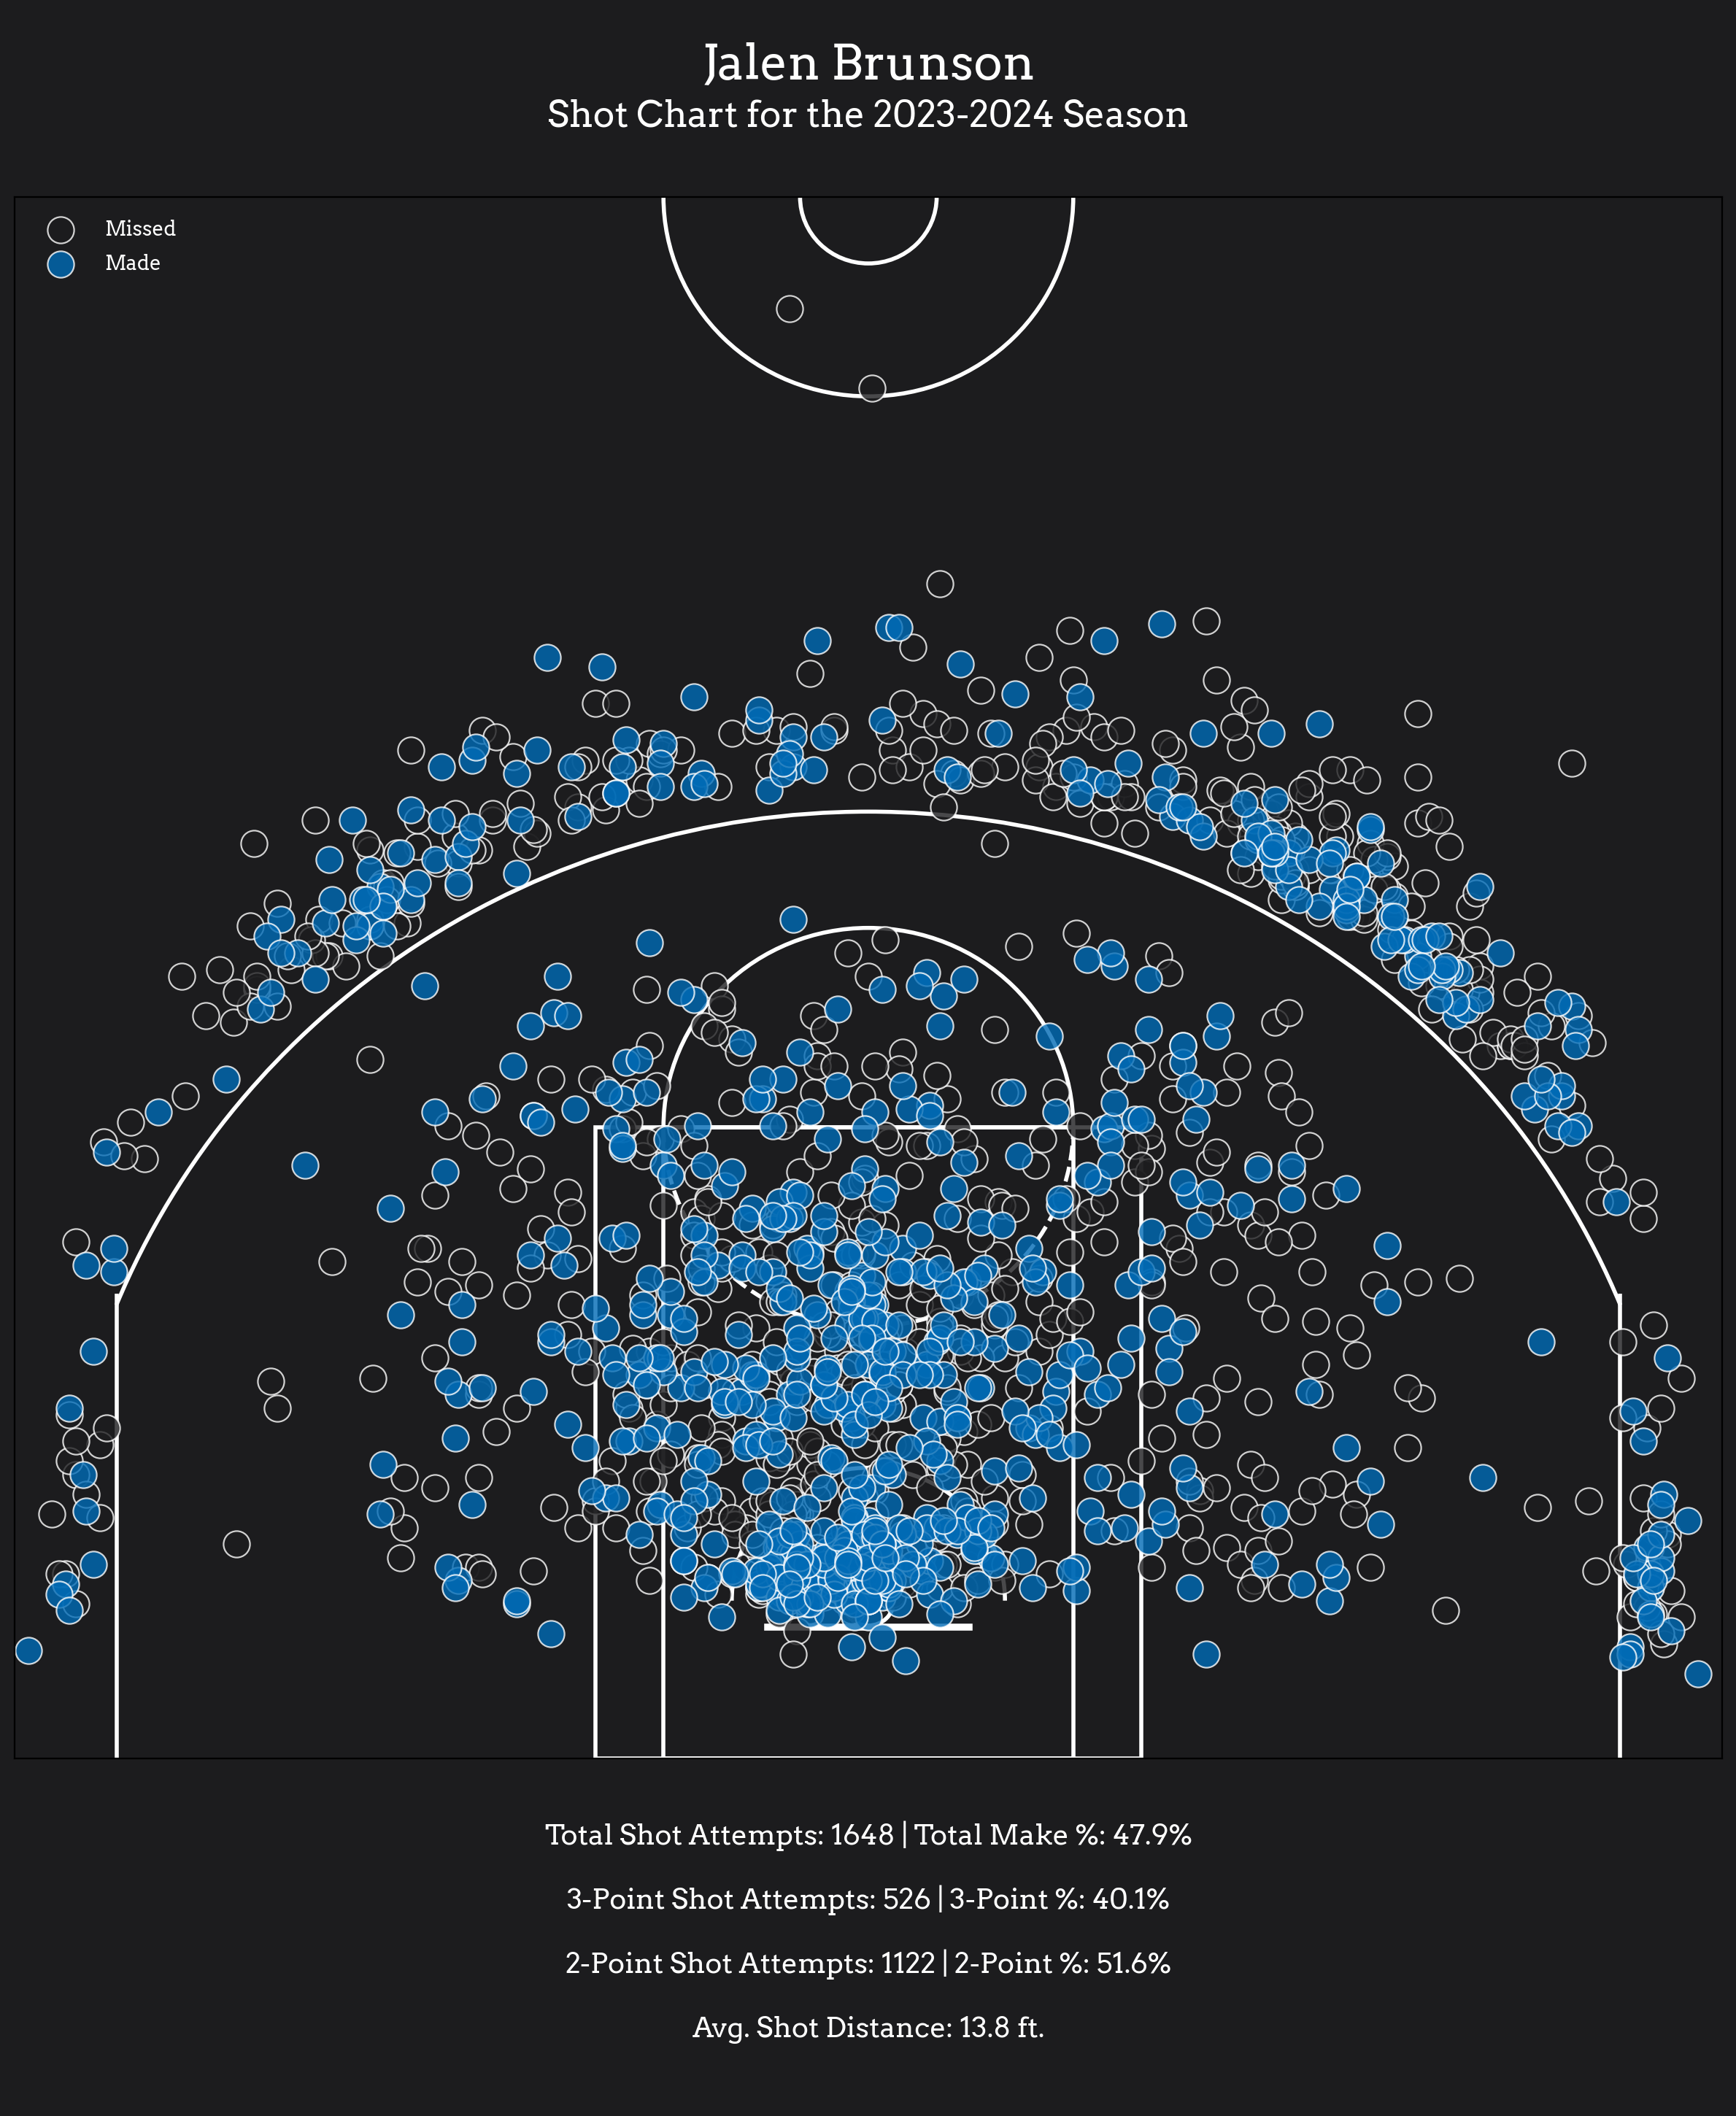

In [1065]:
import matplotlib.pyplot as plt

# Create the figure and main axis for the shot chart
fig = plt.figure(figsize=(12, 11), facecolor=background_color, dpi=200)
ax = fig.add_subplot(111)

draw_court(ax, color=court_color)

# Plot the shots
made_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 0]

ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c=background_color, s=170, alpha=0.8, linewidths=0.8, edgecolors='white', zorder=2, label='Missed')
ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c=team_color, s=170, alpha=0.8, linewidths=0.8, edgecolors='white', zorder=2, label='Made')

# Customize the shot chart axis
ax.set_facecolor(background_color)
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)
ax.set_xticks([])
ax.set_yticks([])

# Add legend
legend = ax.legend(loc='upper left', fontsize=12, frameon=False)
for text in legend.get_texts():
    text.set_color('white')
    text.set_fontproperties(font_props)

# Create a separate axis for the title
ax_title = fig.add_axes([0.1, 1.0, 0.8, 0.1])  # (left, bottom, width, height)
ax_title.set_axis_off()  # Hide the axis box

ax_title.text(0.5, 0.6, f"{player_name}", fontproperties=font_props, fontsize=24, ha='center', color='white', fontweight='bold')
ax_title.text(0.5, 0.3, "Shot Chart for the 2023-2024 Season", fontproperties=font_props, fontsize=18, ha='center', color='white')

# Create a separate axis for statistics
ax_stats = fig.add_axes([0.1, -0.2, 0.8, 0.2])  # (left, bottom, width, height)
ax_stats.set_axis_off()

# Add statistics
ax_stats.text(0.5, 0.8, f"Total Shot Attempts: {total_shots} | Total Make %: {total_make_percentage:.1%}",
              fontproperties=font_props, fontsize=14, ha='center', color='white')
ax_stats.text(0.5, 0.6, f"3-Point Shot Attempts: {three_point_shots.shape[0]} | 3-Point %: {threes_percent}",
              fontproperties=font_props, fontsize=14, ha='center', color='white')
ax_stats.text(0.5, 0.4, f"2-Point Shot Attempts: {two_point_shots.shape[0]} | 2-Point %: {twos_percent}",
              fontproperties=font_props, fontsize=14, ha='center', color='white')
ax_stats.text(0.5, 0.2, f"Avg. Shot Distance: {point_average_distance} ft.",
              fontproperties=font_props, fontsize=14, ha='center', color='white')

plt.tight_layout()
plt.show()


In [1067]:
print(shot_df.columns)

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')
